In [1]:
# Required Libraries
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Reading and Understanding Data**

In [5]:
column_names = ['SENTIMENT', 'REVIEW']
data = pd.read_csv('data.csv', header=None,  names=column_names, encoding='latin-1')

In [6]:
# Displaying the first few 5 rows of dataset
data.head()

,SENTIMENT,REVIEW
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [7]:
# Checking shape of dataset
data.shape

(6910, 2)

In [8]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SENTIMENT  6910 non-null   int64 
 1   REVIEW     6910 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.1+ KB


In [9]:
# Finding missing values
data.isnull().sum()

SENTIMENT    0
REVIEW       0
dtype: int64

In [10]:
# Finding duplicate values
data.duplicated().sum()

5628

In [11]:
# Removing duplicates
data = data.drop_duplicates(keep='first')

In [12]:
data.duplicated().sum()

0

**Exploratory Data Analysis**

In [13]:
#Examining how instances are distributed among different classes in the dataset.
#Count of different labels of sentiments
data['SENTIMENT'].value_counts()

1    727
0    555
Name: SENTIMENT, dtype: int64

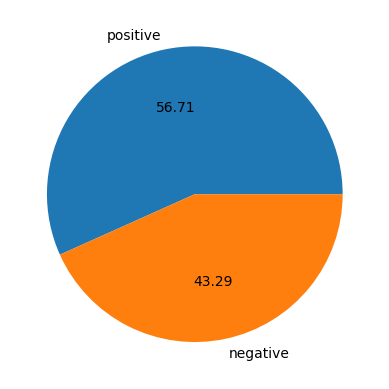

In [14]:
plt.pie(data['SENTIMENT'].value_counts(), labels=['positive', 'negative'],autopct="%0.2f")
plt.show()

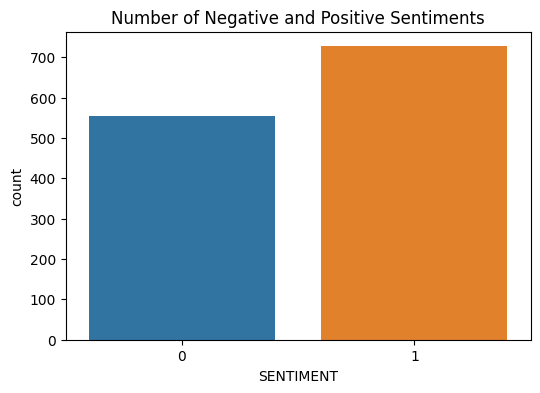

In [15]:

plt.figure(figsize=(6, 4))

sns.countplot(x='SENTIMENT', data=data)

plt.title('Number of Negative and Positive Sentiments')
plt.show()

In [16]:
# wordCloud will enhance the important words in emails
#for visual representations of the frequency of words in a given text.
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

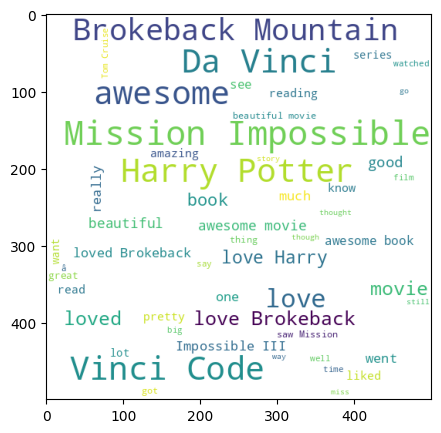

In [17]:
# wordcloud for positive sentiments
pos_wc = wc.generate(data[data['SENTIMENT'] == 1]['REVIEW'].str.cat(sep=" "))
# plot a figure showing those words
plt.figure(figsize=(13,5))
plt.imshow(pos_wc)

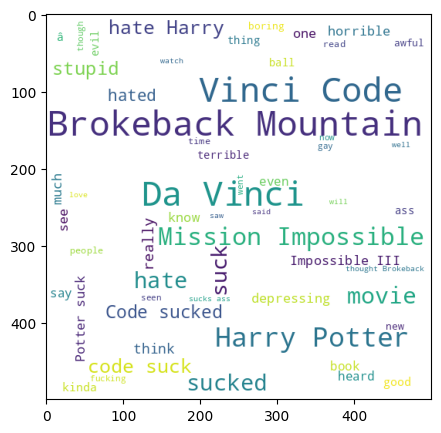

In [18]:
# wordcloud for negative sentiments
pos_wc = wc.generate(data[data['SENTIMENT'] == 0]['REVIEW'].str.cat(sep=" "))
# plot a figure showing those words
plt.figure(figsize=(13,5))
plt.imshow(pos_wc)

**Preprocessing of Data**

In [19]:
# importing string for punctuation constant
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# Required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
def preprocess_text(text):

    wnl= WordNetLemmatizer()
    text = str(text)
    text = text.lower()  # convert into lower case
    text = nltk.word_tokenize(text) # divide text into words

    y = []
    for i in text:  # removing special characters
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:  # removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:   # performing lemmatization
        y.append(wnl.lemmatize(i, pos ="v"))


    return " ".join(y)

In [ ]:
'''# Preprocessing function
def preprocess_text(text):
    text = str(text)
    # Tokenize words
    tokens = word_tokenize(text.lower())
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens]
    # Parts of speech tagging
    tagged = nltk.pos_tag(lemmatized_tokens)  # Tag the lemmatized tokens
    return ' '.join([word + '_' + tag for word, tag in tagged])  # Join words with tag'''

In [22]:
# Apply preprocessing to the text column
data['PROCESSED_REVIEW'] = data['REVIEW'].apply(preprocess_text)

In [23]:
data.head()

,SENTIMENT,REVIEW,PROCESSED_REVIEW
0,1,The Da Vinci Code book is just awesome.,da vinci code book awesome
1,1,this was the first clive cussler i've ever rea...,first clive cussler ever read even book like r...
2,1,i liked the Da Vinci Code a lot.,like da vinci code lot
4,1,I liked the Da Vinci Code but it ultimatly did...,like da vinci code ultimatly seem hold
5,1,that's not even an exaggeration ) and at midni...,even exaggeration midnight go buy da vinci cod...


**Feature Extraction**

In [24]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['PROCESSED_REVIEW']).toarray()
#X_test = tfidf.transform(test_data['Processed_tweet']).toarray()

In [25]:
Y = data['SENTIMENT']

**Train and Test Split**

In [26]:
#to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [29]:
# Splitting training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) # 20% for testing

**Model Building**


*   Naive Bayes
*   Logistic Regression
*   KNearest Neighbor





In [30]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [32]:
# Training the Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, Y_train)

# Predicting on the test set
y_pred = nb.predict(X_test)
# Evaluating the classifier
accuracy_nb = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f_one = f1_score(Y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Printing metrics
print(f"Accuracy of Naive Bayes: {accuracy_nb}")
print(f"Precision of Naive Bayes: {precision}")
print(f"Recall of Naive Bayes: {recall}")
print(f"F1 Score of Naive Bayes: {f_one}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy of Naive Bayes: 0.9494163424124513
Precision of Naive Bayes: 0.9555479195301761
Recall of Naive Bayes: 0.9451465201465201
F1 Score of Naive Bayes: 0.9485152481777697
Confusion Matrix:
[[105  12]
 [  1 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       117
           1       0.92      0.99      0.96       140

    accuracy                           0.95       257
   macro avg       0.96      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



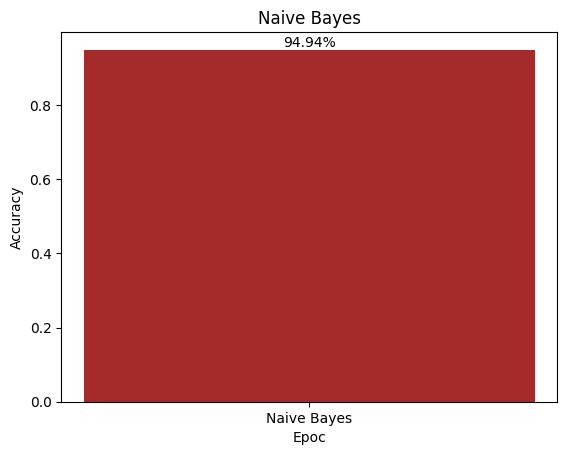

In [33]:
bars = plt.bar('Naive Bayes', accuracy_nb, color='brown')

plt.xlabel('Epoc')
plt.ylabel('Accuracy')
plt.title('Naive Bayes')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy_nb, f'{accuracy_nb:.2%}', ha='center', va='bottom', color='black')

plt.show()

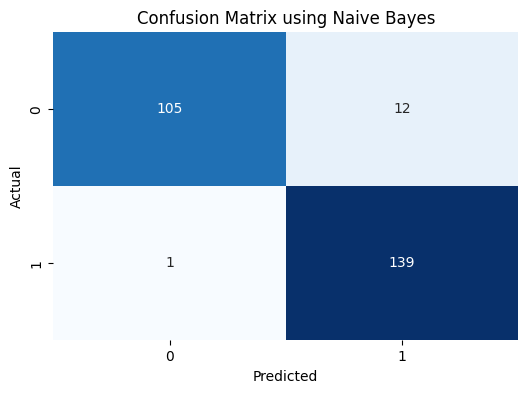

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix using Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
input_review = ["wow, the movie was really good"]
processed_input = preprocess_text(input_review[0])
input_data = tfidf.transform([processed_input])
# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = nb.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sentiment is classified as positive.")
else:
    print("The sentiment is classified as negative.")

[1]
The sentiment is classified as positive.


In [36]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [37]:
# Training the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)
# Evaluating the classifier
accuracy_lr = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f_one = f1_score(Y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Printing metrics
print(f"Accuracy of Logistic Regresion: {accuracy_lr}")
print(f"Precision of Logistic Regresion: {precision}")
print(f"Recall of Logistic Regresion: {recall}")
print(f"F1 Score of Logistic Regresion: {f_one}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy of Logistic Regresion: 0.9610894941634242
Precision of Logistic Regresion: 0.9666666666666667
Recall of Logistic Regresion: 0.9572649572649572
F1 Score of Logistic Regresion: 0.9604371921182266
Confusion Matrix:
[[107  10]
 [  0 140]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       117
           1       0.93      1.00      0.97       140

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



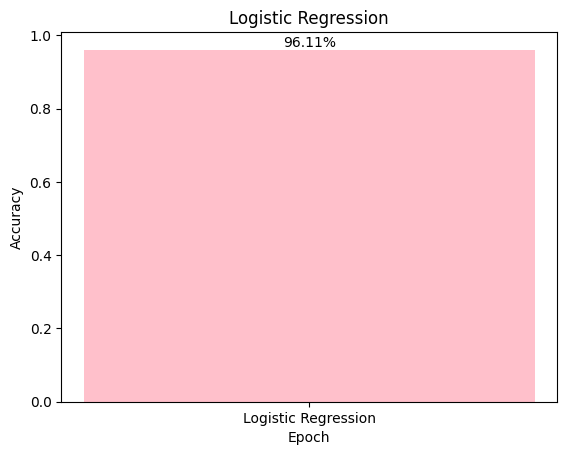

In [38]:
bars = plt.bar('Logistic Regression', accuracy_lr, color='pink')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy_lr, f'{accuracy_lr:.2%}', ha='center', va='bottom', color='black')

plt.show()

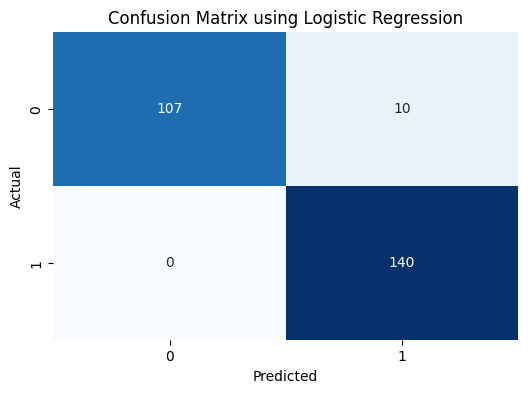

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix using Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
input_review = ["Pathetic, the moving was so boring"]
processed_input = preprocess_text(input_review[0])
input_data = tfidf.transform([processed_input])
# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = lr.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sentiment is classified as positive.")
else:
    print("The sentiment is classified as negative.")

[0]
The sentiment is classified as negative.


In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
# Predicting on the test set
y_pred = knn.predict(X_test)
# Evaluating the classifier
accuracy_knn = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f_one = f1_score(Y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Printing metrics
print(f"Accuracy of KNN: {accuracy_knn}")
print(f"Precision of KNN: {precision}")
print(f"Recall of KNN: {recall}")
print(f"F1 Score of KNN: {f_one}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy of KNN: 0.9182879377431906
Precision of KNN: 0.9252136752136753
Recall of KNN: 0.913064713064713
F1 Score of KNN: 0.9166525103084027
Confusion Matrix:
[[100  17]
 [  4 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       117
           1       0.89      0.97      0.93       140

    accuracy                           0.92       257
   macro avg       0.93      0.91      0.92       257
weighted avg       0.92      0.92      0.92       257



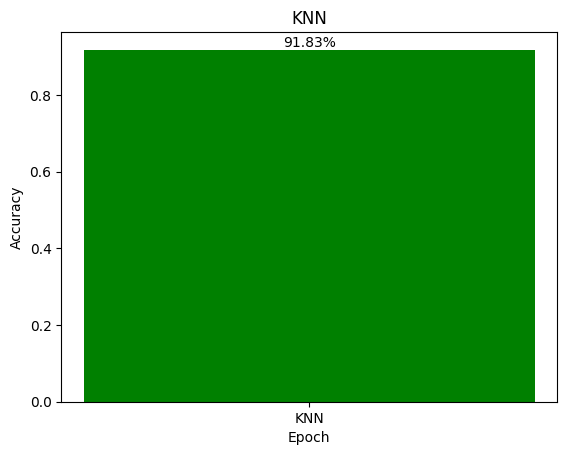

In [44]:
bars = plt.bar('KNN', accuracy_knn, color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('KNN')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy_knn, f'{accuracy_knn:.2%}', ha='center', va='bottom', color='black')

plt.show()

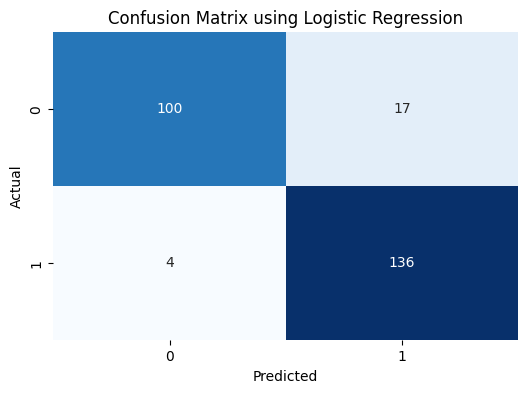

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix using Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
input_review = ["I learnt many good moral lessons from the movie"]
processed_input = preprocess_text(input_review[0])
input_data = tfidf.transform([processed_input])
# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = lr.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sentiment is classified as positive.")
else:
    print("The sentiment is classified as negative.")

[1]
The sentiment is classified as positive.


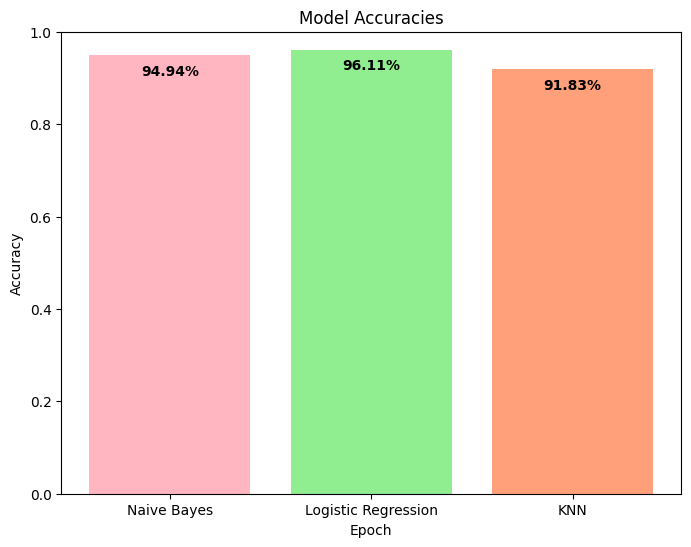

In [49]:

accuracies = [accuracy_nb, accuracy_lr, accuracy_knn]
models = ['Naive Bayes', 'Logistic Regression', 'KNN']

# Plotting the accuracies
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['lightpink', 'lightgreen', 'lightsalmon'])

# Adding text on top of the bars with the percentage values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{acc:.2%}',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for percentage values
plt.show()
